In [1]:
from tensorflow import keras
!pip3 install opencv-python
import cv2
import os
import numpy as np
!pip3 install pandas
import pandas as pd
!pip3 install matplotlib
import matplotlib.pyplot as plt # for data visualization purposes
!pip3 install seaborn
import seaborn as sns # for statistical data visualization
!pip3 install sklearn
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline

In [2]:
dataset = np.load('mnist.npz')
lst = dataset.files
data = []
for item in lst:
#     print(item)
#     print(dataset[item])
    data.append(dataset[item])
    
x_test = data[0]
x_train = data[1]
y_train = data[2]
y_test = data[3]

x_test = np.array(x_test)
x_train = np.array(x_train)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_test.shape
# (X_raw_train, y_train), (X_raw_test, y_test) = dataset.load_data()

(10000, 28, 28)

In [3]:
num,x,y = x_test.shape
x_test = x_test.reshape(num,x*y)
x_test.shape

(10000, 784)

In [4]:
num,x,y = x_train.shape
x_train = x_train.reshape(num,x*y)

(784, 784)
(60000, 2)


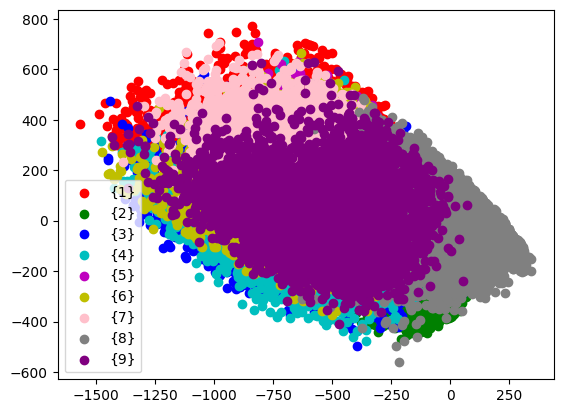

Original Data Size: (60000, 784) 
Modified Data Size: (60000, 2)


In [5]:
class LDA:
    def __init__(self, components=None):
        self.components = components
        self.eighen_vectors = None
    
    def transforamtion(self,train_data,tag):
        nx, ny = train_data.shape
        classes = np.unique(tag)
        num_classes = len(classes)

        total_sc = np.cov(train_data.T)*(nx - 1)
        within_sc = 0
        for i in range(num_classes):
            class_items = np.flatnonzero(tag == classes[i])
            within_sc = within_sc + np.cov(train_data[class_items].T) * (len(class_items)-1)
        
        between_sc = total_sc - within_sc
        _, eighen_vectors = np.linalg.eigh(np.linalg.pinv(within_sc).dot(between_sc))
        print(eighen_vectors.shape)
        pc = train_data.dot(eighen_vectors[:,::-1][:,:self.components])
        print(pc.shape)

        if self.components == 2:
            if tag is None:
                plt.scatter(pc[:,0],pc[:,1])
            else:
                cdict = {1: 'r',2: 'g',3: 'b',4: 'c',5: 'm',6: 'y',7: 'pink',8: 'gray',9: 'purple'}
                colors = ['r','g','b','c','m','y','pink','gray','purple']
                
                labels = np.unique(tag)
                fig, ax = plt.subplots()
                for color, label in zip(colors, labels):
                    class_data = pc[np.flatnonzero(tag==label)]
                    value = {i for i in cdict if cdict[i]==color}
                    ax.scatter(class_data[:,0],class_data[:,1],c = color,label = value)
            ax.legend()
            plt.show()
        return pc



LDA_object = LDA(components=2)
data_modified = LDA_object.transforamtion(x_train, y_train)

print("Original Data Size:",x_train.shape, "\nModified Data Size:", data_modified.shape)